# ACE_krill dataset, extracting the swarm info

## Data description

Data collected during the Antarctic Circumnavigation Expedition (ACE) in 2017 using an EK80 echosounder running at a frequency of 200 kHz.

## Objective

Extracting all the krill swarms and their characteristics.

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
#import scipy.signal
#import skimage

## Import data



We import the csv file.

In [2]:
import ACE_box
import importlib
importlib.reload(ACE_box)

<module 'ACE_box' from '/home/benjamin/Documents/datascience/data jam days/scripts/ACE_box.py'>

In [11]:
data_path = '/home/benjamin/Documents/datascience/ACE/'
data_filename = 'ACE_-D20170207-T104031.sv.csv'
filename = data_path + data_filename
info_df,data_trunc,depth_data = ACE_box.extract_data(filename)

Data matrix size: (2693, 9163)
Start depth (in meters): 0.09278976
Stop depth (in meters): 499.8584359
Nb of pixels along depth axis: 2693
Depth per pixel (in meters): 0.185579519547


## Filtering processes

In [5]:
data_rescale = ACE_box.fix_contrast(data_trunc)

In [4]:
denoised = ACE_box.filter_data(data_trunc)

Number of noisy pixels:  5333


In [6]:
krillsignal,energy_fluctuation = ACE_box.krill_function(denoised,1)

In [7]:
energy_fluctuation

0.71601638948556867

In [85]:
import ACE_box
import importlib
importlib.reload(ACE_box)

<module 'ACE_box' from '/home/benjamin/Documents/datascience/data jam days/scripts/ACE_box.py'>

In [86]:
kchunks = ACE_box.extract_krillchunks(krillsignal,data_trunc)
kchunks_denoised = ACE_box.extract_krillchunks(krillsignal,denoised)
print("Nb of chunks: ",len(kchunks))

Nb of chunks:  54


In [87]:
swarm_list = []
for chunk in kchunks_denoised:
    info_dic = ACE_box.swarm_infos(chunk,info_df,depth_data,data_filename)
    biomass,biomass_per_pixel = ACE_box.krill_brightness(info_dic,data_trunc)
    info_dic['biomass'] = biomass
    info_dic['biomass_per_pixel'] = biomass_per_pixel
    swarm_list.append(info_dic)
    

In [88]:
idx = 4
#print(swarm_list[idx]['ping_index_start'],swarm_list[idx]['ping_index_stop'])
#print(swarm_list[idx]['length'].shape)
for key in swarm_list[idx].keys():
    print(key,':',swarm_list[idx][key])

ping_index_start : 171
ping_index_stop : 181
filename : ACE_-D20170207-T104031.sv.csv
length : 63.95543084
latitude : -68.70195974
longitude : -177.7805339
date : 2017-02-07
time : 10:44:42
boat speed : 16.5659052085
depth_in_pixels : 193.555741024
height_in_pixels : 108.739600997
depth : 44.5055609445
height : 20.1798429088
biomass : -67822.052421
biomass_per_pixel : -62.7981966861


<IPython.core.display.Javascript object>


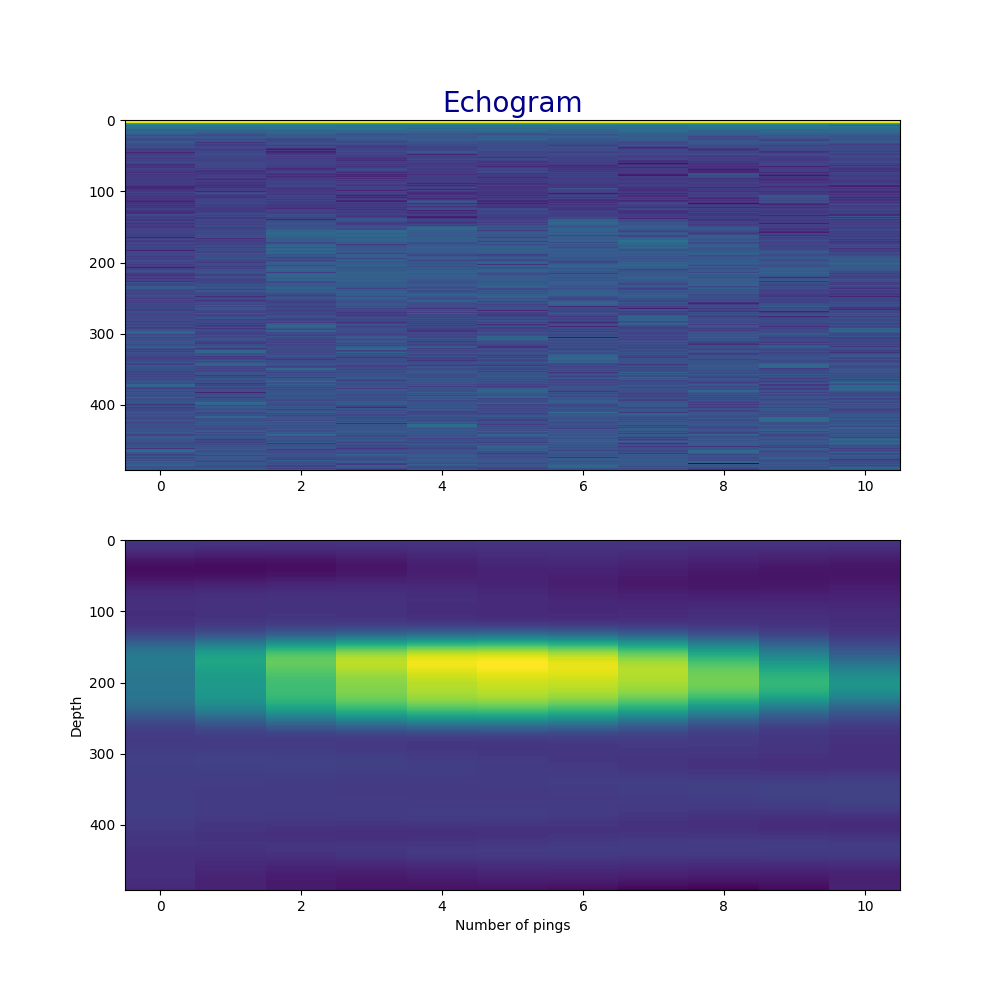

In [49]:
%matplotlib notebook
from matplotlib import pyplot as plt
#idx=1
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,1,1)
ax1.imshow(kchunks[idx]['data'],aspect='auto')
plt.title('Echogram',fontsize=20, color="darkblue")
ax2 = plt.subplot(2,1,2)
ax2.imshow(kchunks_denoised[idx]['data'],aspect='auto')
plt.ylabel('Depth')
plt.xlabel('Number of pings')
plt.show()

## Plotting Swarm information

<IPython.core.display.Javascript object>


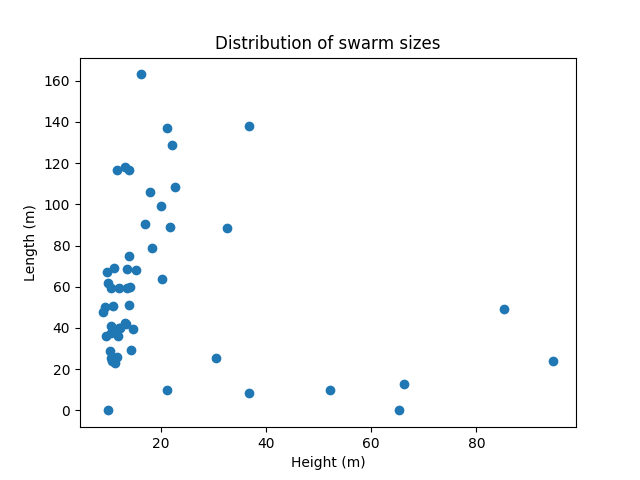

Text(0.5,1,'Distribution of swarm sizes')

In [92]:
H,L = [],[]
for swarm in swarm_list:
    H.append(swarm['height'])
    L.append(swarm['length'])
plt.scatter(H,L)
plt.xlabel('Height (m)')
plt.ylabel('Length (m)')
plt.title('Distribution of swarm sizes')

<IPython.core.display.Javascript object>


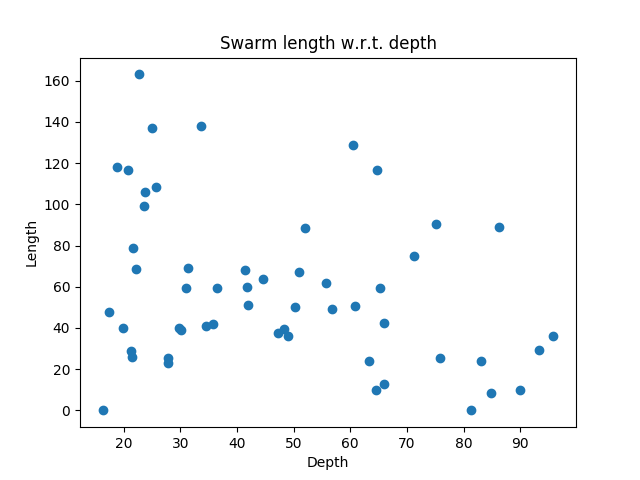

Text(0.5,1,'Swarm length w.r.t. depth')

In [47]:
D,L = [],[]
for swarm in swarm_list:
    D.append(swarm['depth'])
    L.append(swarm['length'])
plt.scatter(D,L)
plt.xlabel('Depth')
plt.ylabel('Length')
plt.title('Swarm length w.r.t. depth')

<IPython.core.display.Javascript object>


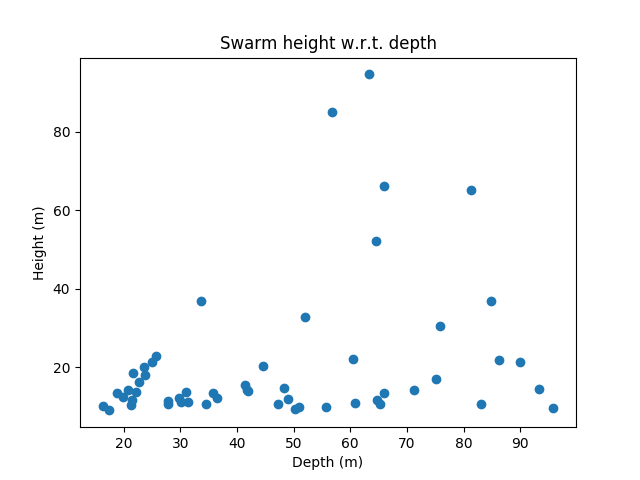

Text(0.5,1,'Swarm height w.r.t. depth')

In [93]:
D,H = [],[]
for swarm in swarm_list:
    D.append(swarm['depth'])
    H.append(swarm['height'])
plt.scatter(D,H)
plt.xlabel('Depth (m)')
plt.ylabel('Height (m)')
plt.title('Swarm height w.r.t. depth')

<IPython.core.display.Javascript object>


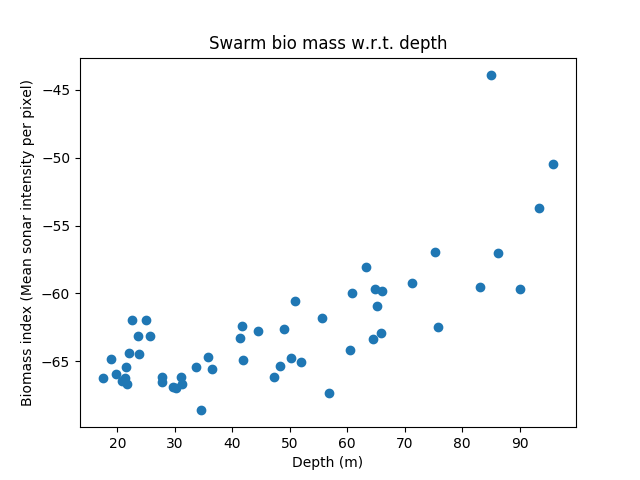

Text(0.5,1,'Swarm bio mass w.r.t. depth')

In [98]:
D,B = [],[]
for swarm in swarm_list:
    if swarm['biomass_per_pixel']!=0: #filter bad swarms
        D.append(swarm['depth'])
        B.append(swarm['biomass_per_pixel'])
plt.scatter(D,B)
plt.xlabel('Depth (m)')
plt.ylabel('Biomass index (Mean sonar intensity per pixel)')
plt.title('Swarm bio mass w.r.t. depth')